<a href="https://colab.research.google.com/github/madhushani1/Assessment/blob/main/Week1___Vitals__Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
upload = files.upload()
import zipfile

Saving patient_vitals.csv to patient_vitals.csv


In [4]:
import io

print ("...First 5 rows data ....")
# Load the CSV data into a pandas DataFrame from the uploaded files
# The 'upload' variable contains the uploaded file as bytes
csv_data = upload['patient_vitals.csv'].decode('utf-8')
df = pd.read_csv(io.StringIO(csv_data))
print(df.head())

...First 5 rows data ....
  PatientID  Age  Gender  HeartRate  SystolicBP  DiastolicBP
0    PID001   63    Male         78         145           91
1    PID002   37  Female         72         120           80
2    PID003   41  Female         85         130           85
3    PID004   56    Male         90         148           94
4    PID005   72  Female         68         155           92


In [5]:
print(".\Data Inforamtion Summary")
df.info

.\Data Inforamtion Summary


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-3927578487.py:1: SyntaxWarning: invalid escape sequence '\D'
  print(".\Data Inforamtion Summary")


<bound method DataFrame.info of    PatientID  Age  Gender  HeartRate  SystolicBP  DiastolicBP
0     PID001   63    Male         78         145           91
1     PID002   37  Female         72         120           80
2     PID003   41  Female         85         130           85
3     PID004   56    Male         90         148           94
4     PID005   72  Female         68         155           92
..       ...  ...     ...        ...         ...          ...
95    PID096   75    Male         80         165           98
96    PID097   47    Male         85         140           90
97    PID098   60  Female         74         143           91
98    PID099   39  Female         79         122           80
99    PID100   52    Male         86         137           88

[100 rows x 6 columns]>

In [7]:
# Calculate the mean of the 'Age' column - Q1
average_age = df ['Age' ] . mean ( )

print(f"Report Insight 1: The average patient age is {average_age:.2f} years.")

Report Insight 1: The average patient age is 49.21 years.


In [8]:
# Calculate the max and min of the 'HeartRate' column - Q2
max_heart_rate = df ['HeartRate' ]. max ( )
min_heart_rate = df ['HeartRate' ].min()

print(f"Report Insight 2: Heart rates range from {min_heart_rate} bpm to {max_heart_rate} bpm.")

Report Insight 2: Heart rates range from 68 bpm to 92 bpm.


In [9]:
# Calculate the max and min of the 'HeartRate' column - Q2
max_heart_rate = df ['HeartRate' ]. max ( )
min_heart_rate = df ['HeartRate' ].min()

print(f"Report Insight 2: Heart rates range from {min_heart_rate} bpm to {max_heart_rate} bpm.")

Report Insight 2: Heart rates range from 68 bpm to 92 bpm.


In [10]:
# Create a new DataFrame containing only the rows where SystolicBP > 140 - Q3
hypertensive_patients = df [df ['SystolicBP' ] > 140]

# Get the number of rows in this new DataFrame
num_hypertensive = len(hypertensive_patients)

print(f"Report Insight 3: {num_hypertensive} patients show signs of hypertension (Systolic BP > 140).")

Report Insight 3: 38 patients show signs of hypertension (Systolic BP > 140).


In [11]:
# Filter for rows where BOTH conditions are true: - Q4
# 1. 'Gender' column is 'Female'
# 2. 'Age' column is greater than 60
high_risk_females = df [(df ['Gender'] == 'Female') & (df ['Age'] > 60)]

print("\n --- High-Risk Group Report (Females over 60) --_ ")
print(high_risk_females)


 --- High-Risk Group Report (Females over 60) --_ 
   PatientID  Age  Gender  HeartRate  SystolicBP  DiastolicBP
4     PID005   72  Female         68         155           92
13    PID014   61  Female         74         142           90
17    PID018   67  Female         71         152           93
25    PID026   64  Female         72         147           92
29    PID030   69  Female         70         154           93
35    PID036   62  Female         73         145           91
39    PID040   66  Female         72         151           92
49    PID050   70  Female         71         156           94
55    PID056   63  Female         74         146           92
59    PID060   68  Female         70         153           93
65    PID066   61  Female         73         144           91
69    PID070   67  Female         71         152           93
77    PID078   64  Female         72         147           92
81    PID082   69  Female         69         154           93
87    PID088   62 

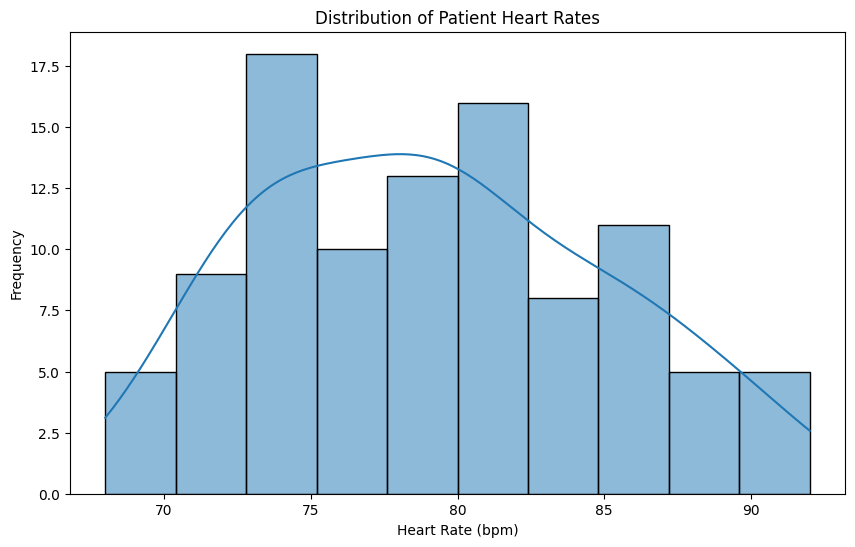

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='HeartRate', ax=ax, bins=10, kde=True)
plt.title("Distribution of Patient Heart Rates")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.show()

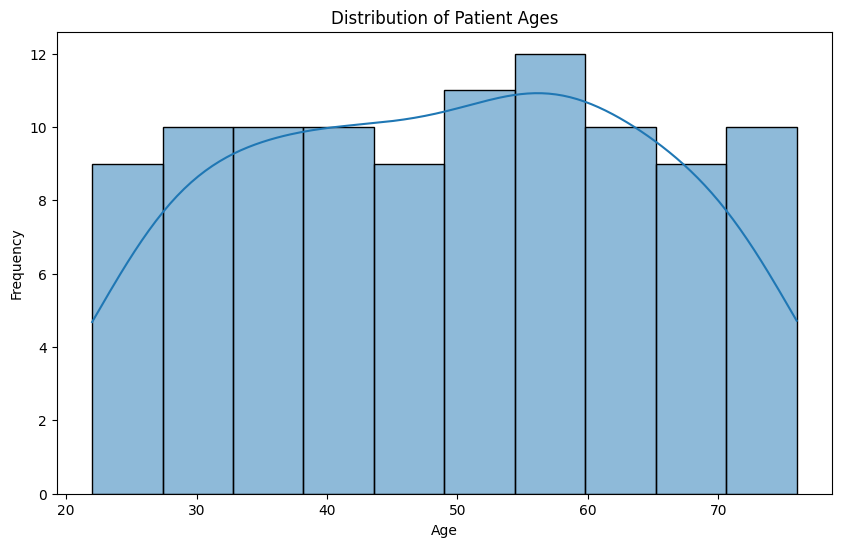

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10, kde=True)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt. show()

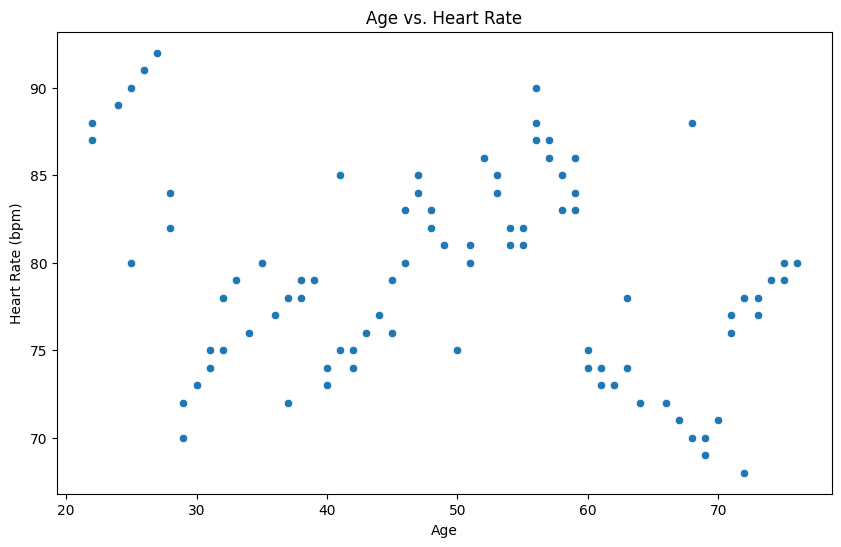

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='HeartRate' )
plt.title("Age vs. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate (bpm)")
plt. show()

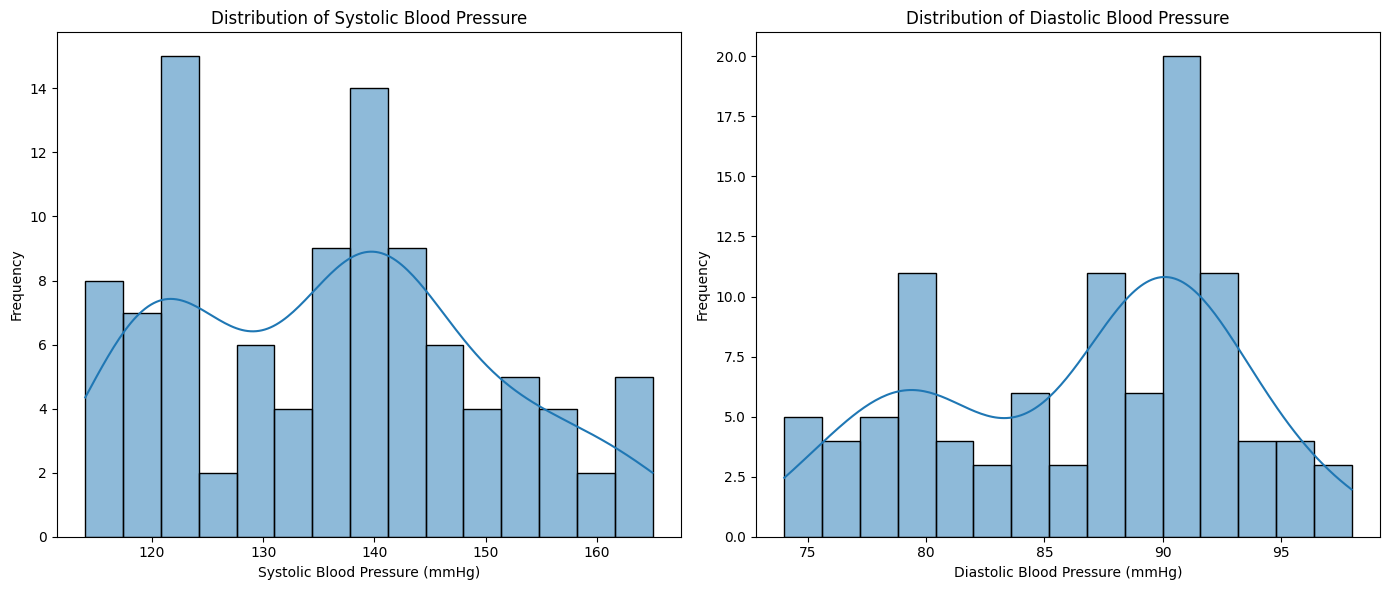

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='SystolicBP', ax=axes [0], bins=15, kde=True)
axes [0].set_title("Distribution of Systolic Blood Pressure")
axes [0]. set_xlabel("Systolic Blood Pressure (mmHg)")
axes [0].set_ylabel("Frequency")

sns.histplot(data=df, x='DiastolicBP', ax=axes [1], bins=15, kde=True)
axes [1].set_title("Distribution of Diastolic Blood Pressure")
axes [1]. set_xlabel("Diastolic Blood Pressure (mmHg)")
axes [1].set_ylabel("Frequency")

plt.tight_layout()
plt. show( )

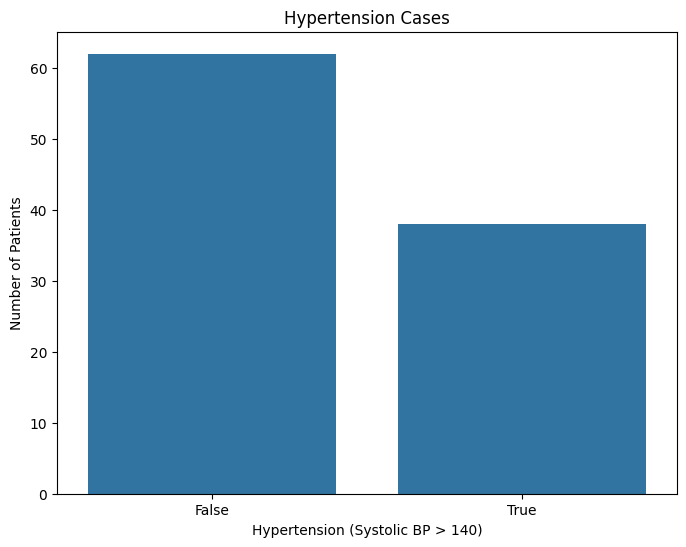

In [16]:
df ['Hypertension'] = df ['SystolicBP' ] > 140

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hypertension' )
plt.title("Hypertension Cases")
plt.xlabel("Hypertension (Systolic BP > 140)")
plt.ylabel("Number of Patients")
plt.show()

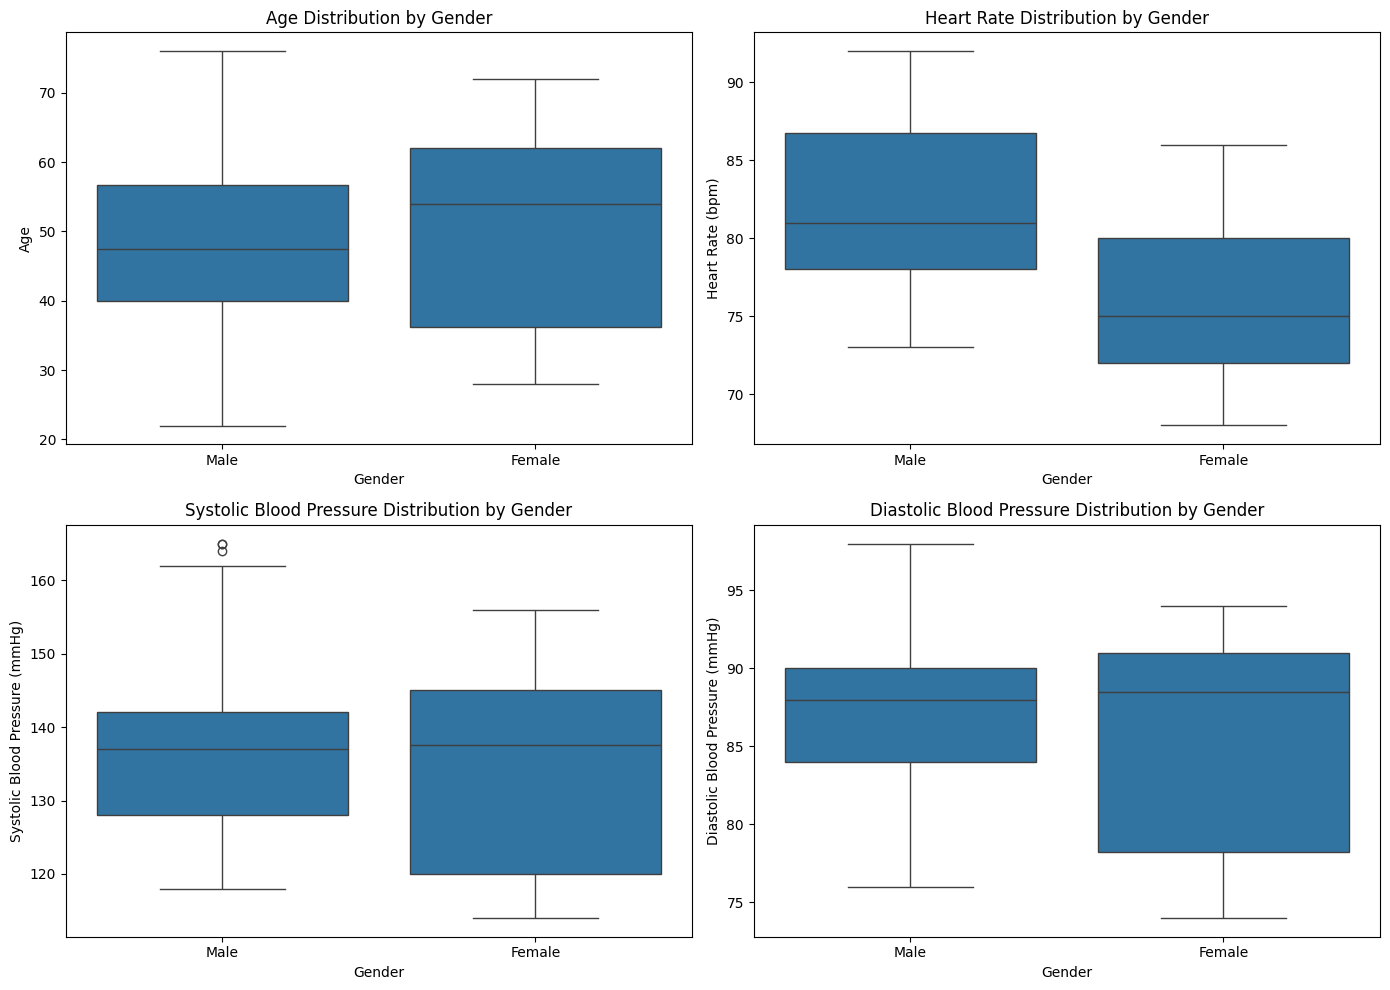

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='Gender', y='Age', ax=axes [0, 0] )
axes [0, 0].set_title("Age Distribution by Gender")
axes [0, 0].set_ylabel("Age")

sns.boxplot(data=df, x='Gender', y='HeartRate', ax=axes [0, 1])
axes [0, 1].set_title("Heart Rate Distribution by Gender")
axes[0, 1].set_ylabel("Heart Rate (bpm)")

sns.boxplot(data=df, x='Gender', y='SystolicBP', ax=axes [1, 0] )
axes [1, 0].set_title("Systolic Blood Pressure Distribution by Gender")
axes[1, 0].set_ylabel("Systolic Blood Pressure (mmHg)")

sns.boxplot(data=df, x='Gender', y='DiastolicBP', ax=axes [1, 1])
axes[1, 1].set_title("Diastolic Blood Pressure Distribution by Gender")
axes [1, 1].set_ylabel("Diastolic Blood Pressure (mmHg)")

plt.tight_layout ()
plt.show()

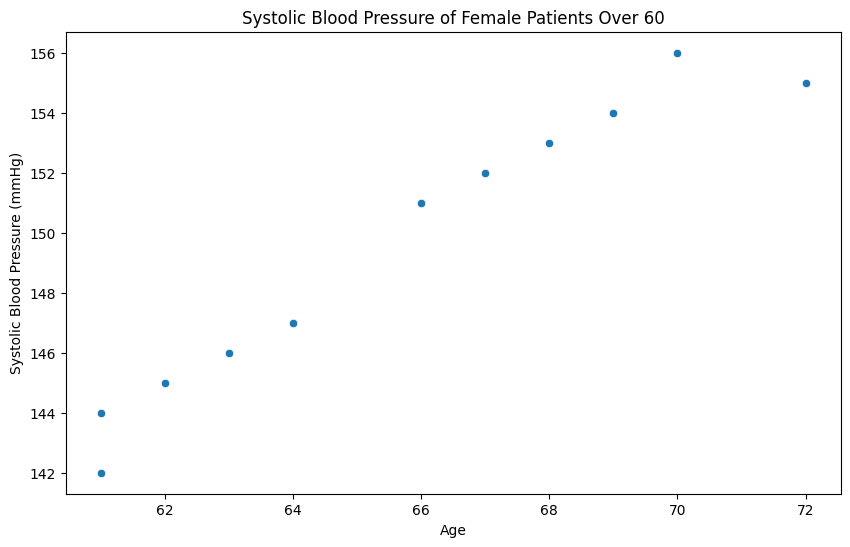

In [18]:
high_risk_females = df [(df ['Gender'] == 'Female' ) & (df['Age'] > 60)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_risk_females, x='Age', y='SystolicBP' )
plt.title("Systolic Blood Pressure of Female Patients Over 60")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.show()